In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcdefaults()
plt.rcParams.update({'figure.dpi':100})
plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
plt.rcParams.update({'axes.formatter.limits': (-2, 2)})
# My own adds to Carles' rcParams updates
#plt.rcParams.update({'lines.markersize': 8}) 6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})

In [3]:
# Choose data vector centered at origin with variance of 1: p-bar = 0, sigma_p = 1

In [4]:
# Dimension-wise likelihood: [n, n], prior: constant, model: [n, 1]
#                             p, b                            b
def Marginalize(likelihood, prior, model):
    integrand = likelihood*prior
    return np.trapz(integrand, b)

def cov_gen(a_min, a_max, b_min, b_max):
    a = np.random.uniform(a_min, a_max)
    b = np.random.uniform(b_min, b_max)
    return np.array([[1, a], [a, b]])

def Gaussian_Likelihood(p, b, cov):
    L = np.zeros((len(p), len(b)))
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    for i in range(len(p)):
        for j in range(len(b)):
            x = np.asarray([p[i], b[j]])
            l = np.exp((-1/2)*(x.T@inv@x))/(2*np.pi*np.sqrt(det))
            L[i, j] = l
    return L

def Gaussian(x, mean_x, var_x):
    return (1/((2*np.pi*var_x)**(1/2)))*np.exp((-1/2)*(((x-mean_x)**2)/var_x))

def var_b_gen(a):
    return np.random.uniform(a**2, 10)

In [25]:
p = np.linspace(-5, 5, 100)
b = np.linspace(-10, 10, 1000)
mean = np.array([np.mean(p), np.mean(b)])

In [ ]:
################ Gaussian Likelihood ##################
a = np.random.uniform(-1, 1)
var_b = var_b_gen(a)
cov = np.array([[1, a],[a, var_b]])

In [6]:
L = Gaussian_Likelihood(p, b, cov)
L_p = Marginalize(L, 1, b)

In [7]:
G_p = Gaussian(p, np.mean(p), 1)

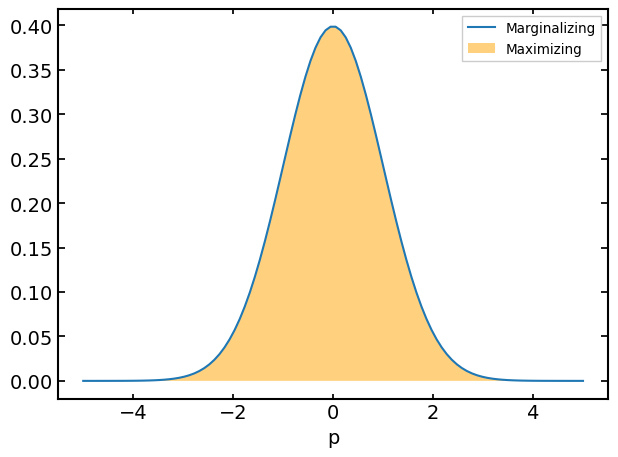

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(p, L_p, label='Marginalizing')
ax.fill(p, G_p, facecolor='orange', alpha=0.5, label='Maximizing')
ax.set_xlabel('p')
ax.legend()

Top hat shape, few widths

In [9]:
############### Top-hat Likelihood ##################
def get_range(x, x_width):
    x_lim = x_width/2
    x_range = np.where(np.abs(x)<=x_lim)
    return (np.min(x_range), np.max(x_range)+1)

def get_val(p_width, b_width):
    return(1/(p_width*b_width))

# this is for a top hat centered about 0
def Tophat_Likelihood(p, b, p_width, b_width, val):
    L = np.zeros((len(p), len(b)))
    p_min, p_max = get_range(p, p_width)
    b_min, b_max = get_range(b, b_width)
    L[p_min:p_max, b_min:b_max]=val
    return L

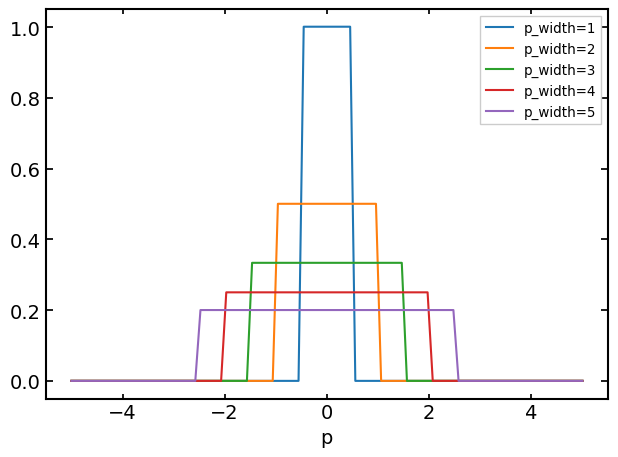

In [10]:
p_widths = np.arange(1, 6)

fig, ax = plt.subplots(1, 1)

for i in range(len(p_widths)):
    p_width = p_widths[i]
    b_width = 10
    val = get_val(p_width, b_width)
    L_tophat = Tophat_Likelihood(p, b, p_width, b_width, val)
    L_p_tophat = Marginalize(L_tophat, 1, b)
    ax.plot(p, L_p_tophat, label='p_width={}'.format(p_width))

    ax.set_xlabel('p')
    ax.legend()

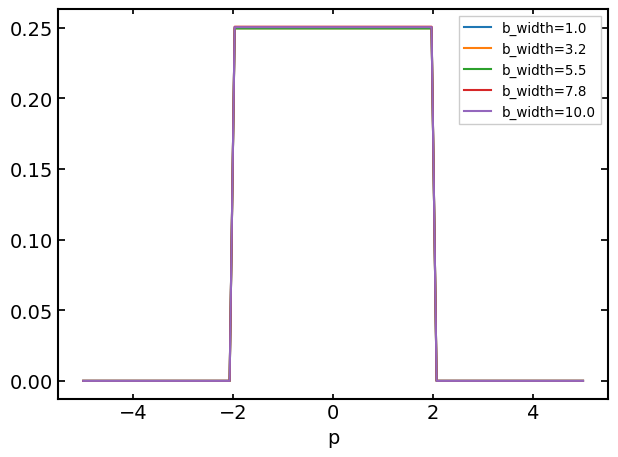

In [23]:
b_widths = np.linspace(1, 10, 5)

fig, ax = plt.subplots(1, 1)

for i in range(len(b_widths)):
    p_width = 4
    b_width = b_widths[i]
    val = get_val(p_width, b_width)
    L_tophat = Tophat_Likelihood(p, b, p_width, b_width, val)
    L_p_tophat = Marginalize(L_tophat, 1, b)
    ax.plot(p, L_p_tophat, label='b_width={:.1f}'.format(b_width))
    
    ax.set_xlabel('p')
    ax.legend()

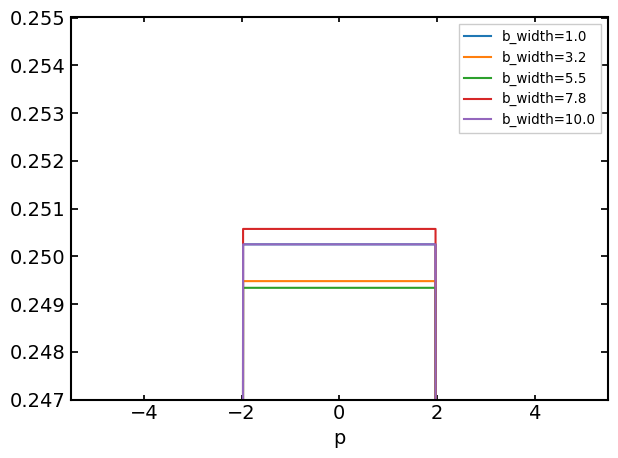

In [21]:
b_widths = np.linspace(1, 10, 5)

fig, ax = plt.subplots(1, 1)

for i in range(len(b_widths)):
    p_width = 4
    b_width = b_widths[i]
    val = get_val(p_width, b_width)
    L_tophat = Tophat_Likelihood(p, b, p_width, b_width, val)
    L_p_tophat = Marginalize(L_tophat, 1, b)
    ax.plot(p, L_p_tophat, label='b_width={:.1f}'.format(b_width))
    
    ax.set_ylim([0.247, 0.255])
    ax.set_xlabel('p')
    ax.legend()

In [41]:
################# Coupled Likelihood #################
def Coupled_example(p, b, mean, var):
    p_mean = mean[0]
    b_mean = mean[1]
    L = np.zeros((len(p), len(b)))
    for i in range(len(p)):
        for j in range(len(b)):
            L[i][j]=np.exp((-(p[i]*b[j]-(p_mean*b_mean))**2)/(2*var))
    return L

def Top_hat(length, max_val, max_center, half_width):
    L = np.zeros(length)
    L[max_center-half_width:max_center+half_width]=max_val
    return L

In [57]:
A = Coupled_example(p, b, mean, 1)
Gaussian_prior = Gaussian(b, 0, 1)
Top_hat_prior = Top_hat(len(b), 0.3, int(len(b)/2), int(len(b)/4))

In [58]:
Coupled_flat_marginalized = Marginalize(A, Top_hat_prior, b)
Coupled_Gaussian_marginalized = Marginalize(A, Gaussian_prior, b)

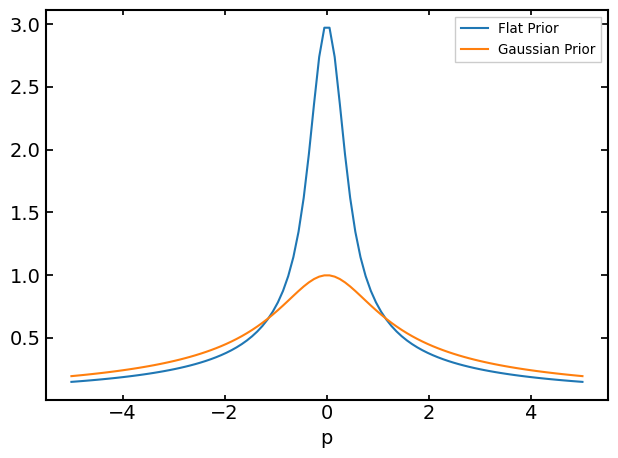

In [59]:
fig, ax = plt.subplots(1, 1)
ax.plot(p, Coupled_flat_marginalized, label='Flat Prior')
ax.plot(p, Coupled_Gaussian_marginalized, label='Gaussian Prior')
#ax.fill(p, G_p, facecolor='orange', alpha=0.5, label='Maximizing')
ax.set_xlabel('p')
ax.legend()

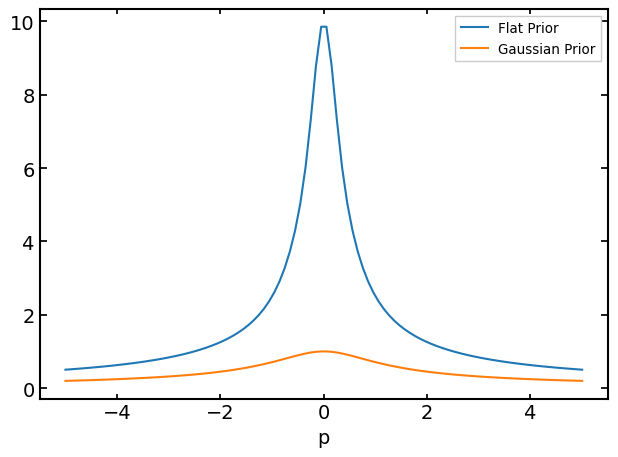

In [50]:
Top_hat_prior = Top_hat(len(b), 1, int(len(b)/2.5), int(len(b)/4))
Coupled_flat_marginalized = Marginalize(A, Top_hat_prior, b)
fig, ax = plt.subplots(1, 1)
ax.plot(p, Coupled_flat_marginalized, label='Flat Prior')
ax.plot(p, Coupled_Gaussian_marginalized, label='Gaussian Prior')
#ax.fill(p, G_p, facecolor='orange', alpha=0.5, label='Maximizing')
ax.set_xlabel('p')
ax.legend()